# ECONOMETRIZANDO - Parte 1:

## SOBRE O PROBLEMA

O motivo para esta análise é entender como a eficiência de produção influencia os custos e a produção das empresas em uma indústria competitiva. Cada empresa enfrenta diferentes preços para os fatores de produção, como trabalho e matéria-prima. Portanto, elas têm diferentes custos totais, médios e marginais.

Para focarmos na conexão entre eficiência de produção e produto, assumimos que todas as empresas enfrentam mais ou menos os mesmos preços dos fatores. A única razão pela qual as curvas de custo médio (AC) e custo marginal (MC) diferem entre as empresas é a diferença na eficiência produtiva. Por exemplo, uma empresa pode ser menos eficiente do que outra devido a diferentes tecnologias, habilidades da força de trabalho ou gestão.

As curvas de custo médio (AC) e custo marginal (MC) têm uma inclinação positiva para refletir retornos decrescentes de escala. Isso significa que, à medida que a produção aumenta, os custos médios e marginais tendem a aumentar também, devido a limitações como capacidade de fábrica, logística ou gerenciamento de pessoal.

Para ilustrar, imagine duas empresas, A e B. Se a empresa A for menos eficiente que a empresa B, suas curvas de custo médio e marginal estarão à esquerda das da empresa B. Isso significa que, para produzir a mesma quantidade de produto, a empresa A terá custos médios e marginais mais altos do que a empresa B.

Resumindo, a motivação econômica para essa análise é entender como a eficiência de produção afeta os custos e a produção das empresas em uma indústria competitiva, onde os preços dos fatores de produção são semelhantes para todas as empresas.

## SOBRE OS DADOS

Utilização do Método de Mínimos Quadrados Ordinários (MCO): Retornos à Escala na Indústria Elétrica

Este estudo tem suas raízes no trabalho pioneiro de Nerlove (1963), que abordou os retornos à escala em uma indústria elétrica sujeita a regulamentação. Nerlove forneceu uma descrição detalhada da indústria elétrica, destacando os seguintes pontos:

1. Os fornecedores/geradores de eletricidade geralmente operam como monopólios locais privados.
2. Os preços da eletricidade para os consumidores finais são fixados por uma autoridade reguladora.
3. Os preços dos fatores de produção são estabelecidos e não podem ser alterados pelas empresas no curto prazo, devido a contratos de longo prazo, como os contratos de trabalho.

Quanto aos dados, eles abrangem 145 empresas localizadas em 44 estados dos EUA no ano de 1955, representando cerca de 80% da produção total de eletricidade na época.

Em termos dos métodos de produção de eletricidade, Nerlove identificou três principais:

1. Motores de combustão interna.
2. Hidroelétricas.
3. Termoelétricas.

Ele observou que, na década de 1950, cerca de 70% da eletricidade era gerada por usinas termoelétricas. O carvão era o principal combustível utilizado, seguido pelo petróleo e gasolina.


As variáveis consideradas são: custos totais, preços dos fatores de produção (salários, preços de combustíveis, aluguel ou preço do capital) e produto. Embora as empresas sejam proprietárias do capital, no modelo, presume-se que elas se comportem como se estivessem pagando um aluguel pelo capital, então é atribuído um preço ao custo do capital.

No entanto, para obter mais detalhes, consulte o documento original de Nerlove, onde a construção da base de dados é descrita com maior precisão. Os dados de produção, combustíveis e custos trabalhistas foram obtidos da Federal Power Commission (1956).

https://econpapers.repec.org/paper/bocbocins/nerlove63.htm

### Bibliotecas

In [213]:
import pyreadstat  # Biblioteca para ler formato .dta
import pandas as pd  # Biblioteca para manipulação de dados
import matplotlib  # Biblioteca para plotagem
import seaborn as sns
from matplotlib import pyplot as plt  # Biblioteca para plotagem
import statsmodels.api as sm  # Biblioteca para análise estatística
from IPython.display import Image  # Para imagens
import numpy as np  # Algumas funções matemáticas
import statsmodels.api as sm  # Para funções de regressão e outros
from statsmodels.formula.api import ols  # Para testes de hipóteses
import warnings
warnings.filterwarnings('ignore')

### Dados

In [214]:
df = pd.read_stata('https://econpapers.repec.org/scripts/redir.pf?u=http%3A%2F%2Ffmwww.bc.edu%2Fec-p%2Fdata%2Fhayashi%2Fnerlove63.dta;h=repec:boc:bocins:nerlove63')
df

,totcost,output,plabor,pfuel,pkap
0,0.082000,2.0,2.09,17.900000,183.0
1,0.661000,3.0,2.05,35.099998,174.0
2,0.990000,4.0,2.05,35.099998,171.0
3,0.315000,4.0,1.83,32.200001,166.0
4,0.197000,5.0,2.12,28.600000,233.0
...,...,...,...,...,...
140,44.894001,9956.0,1.68,28.799999,203.0
141,67.120003,11477.0,2.24,26.500000,151.0
142,73.050003,11796.0,2.12,28.600000,148.0
143,139.421997,14359.0,2.31,33.500000,212.0


### Análise Exploratória

In [215]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   totcost  145 non-null    float32
 1   output   145 non-null    float32
 2   plabor   145 non-null    float32
 3   pfuel    145 non-null    float32
 4   pkap     145 non-null    float32
dtypes: float32(5)
memory usage: 3.0 KB


In [216]:
# Verificando se existem valores nulos
df.isnull().sum()

totcost    0
output     0
plabor     0
pfuel      0
pkap       0
dtype: int64

In [217]:
# Verificando se existem valores duplicados
df.duplicated().sum()

0

In [218]:
# Arredondando as estatístias descritivas
df.describe().round(2)

,totcost,output,plabor,pfuel,pkap
count,145.00,145.00,145.00,145.00,145.00
mean,12.98,2133.08,1.97,26.18,174.50
std,19.79,2931.94,0.24,7.88,18.21
min,0.08,2.00,1.45,10.30,138.00
25%,2.38,279.00,1.76,21.30,162.00
50%,6.75,1109.00,2.04,26.90,170.00
75%,14.13,2507.00,2.19,32.20,183.00
max,139.42,16719.00,2.32,42.80,233.00


Sempre é interessante analisarmos como cada variável está distribuída e no caso desse conjunto de dados, temos apenas variáveis numéricas.

In [219]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Criar um subplot com o número correto de linhas e colunas
fig = make_subplots(rows=2, cols=3, subplot_titles=df.columns)

# Lista de cores mais adequadas para pessoas com miopia
cores_miopia = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Adicionar histogramas para cada coluna do DataFrame
for i, col in enumerate(df.columns):
    # Calcular o histograma
    hist, bins = np.histogram(df[col], bins=20)
    # Criar o gráfico de barras
    trace = go.Bar(x=bins[:-1], y=hist, name=col, marker_color=cores_miopia[i])
    # Adicionar o gráfico ao subplot
    fig.add_trace(trace, row=(i // 3) + 1, col=(i % 3) + 1)

# Atualizar o layout
fig.update_layout(
    height=800,
    width=1000,
    title=dict(text='Distribuição dos Dados', x=0.5, y=0.98, font=dict(size=16)),  # Centralizando o título do gráfico
    legend=dict(
        orientation="h",
        yanchor="top",  # Ancorar a legenda no topo
        y=1.05,  # Ajustando a posição vertical da legenda
        xanchor="right",
        x=1,
    ),
    annotations=[dict(text="Autor: Jonatas A. Liberato", x=0.88, y=-0.1, xref="paper", yref="paper", showarrow=False)],  # Adicionando a anotação
)

# Exibir o gráfico
fig.show()

### Valores Logarítimicos

Para melhor trabalharmos com os valores, faremos uma conversão dos valores em escalas logarítmicas e criaremos uma coluna com o custo médio:

In [220]:
# Nomes das colunas
df.columns

Index(['totcost', 'output', 'plabor', 'pfuel', 'pkap'], dtype='object')

In [221]:
# Criando novas colunas com valores dos logaritmos
df['l_totcost'] = np.log(df['totcost'])
df['l_output'] = np.log(df['output'])
df['l_plabor'] = np.log(df['plabor'])
df['l_pfuel'] = np.log(df['pfuel'])
df['l_pkap'] = np.log(df['pkap'])
df['mediancost'] = df['totcost'] / df['output']

### Coluna intercept

A coluna `intercept` com valor constante igual a 1 é adicionada ao DataFrame para representar o termo de interceptação em modelos de regressão linear. Isso permite que a linha de regressão não necessariamente passe pela origem dos eixos, ajustando-a para melhor se adequar aos dados.

In [222]:
df['intercept'] = 1
df

,totcost,output,plabor,pfuel,pkap,l_totcost,l_output,l_plabor,l_pfuel,l_pkap,mediancost,intercept
0,0.082000,2.0,2.09,17.900000,183.0,-2.501036,0.693147,0.737164,2.884801,5.209486,0.041000,1
1,0.661000,3.0,2.05,35.099998,174.0,-0.414001,1.098612,0.717840,3.558201,5.159055,0.220333,1
2,0.990000,4.0,2.05,35.099998,171.0,-0.010050,1.386294,0.717840,3.558201,5.141664,0.247500,1
3,0.315000,4.0,1.83,32.200001,166.0,-1.155183,1.386294,0.604316,3.471967,5.111988,0.078750,1
4,0.197000,5.0,2.12,28.600000,233.0,-1.624552,1.609438,0.751416,3.353407,5.451038,0.039400,1
...,...,...,...,...,...,...,...,...,...,...,...,...
140,44.894001,9956.0,1.68,28.799999,203.0,3.804304,9.205931,0.518794,3.360375,5.313206,0.004509,1
141,67.120003,11477.0,2.24,26.500000,151.0,4.206482,9.348101,0.806476,3.277145,5.017280,0.005848,1
142,73.050003,11796.0,2.12,28.600000,148.0,4.291144,9.375516,0.751416,3.353407,4.997212,0.006193,1
143,139.421997,14359.0,2.31,33.500000,212.0,4.937505,9.572132,0.837247,3.511545,5.356586,0.009710,1


In [223]:
# Subplot
fig = make_subplots(rows=1, cols=1)

# Calcula o histograma
hist, bins = np.histogram(df['totcost'], bins=20)

# Criar o gráfico de barras
trace = go.Bar(x=bins[:-1], y=hist, marker_color=cores_miopia[0])
fig.add_trace(trace, row=1, col=1)
fig.update_layout(
    height=600,
    width=800,
    title=dict(text="Histograma totcost (em milhões de dólares USD)", x=0.5, y=0.98, font=dict(size=16)),
    xaxis_title="totcost",
    yaxis_title="milhões de dólares",
    annotations=[dict(text="Autor: Jonatas A. Liberato", x=0.88, y=-0.1, xref="paper", yref="paper", showarrow=False)],
)
fig.show()

Podemos observar que os dados têm uma ampla dispersão, com valores variando de 0.082 milhões de dólares a 139.42 milhões de dólares. A média é de aproximadamente 12.98 milhões de dólares, indicando uma tendência central dos dados. No entanto, a presença de valores extremamente altos contribui para uma distribuição assimétrica à direita, como sugerido pela diferença entre a média e a mediana. Isso implica que uma parte significativa dos dados está concentrada em valores menores, com uma cauda longa em direção aos valores mais altos.

#### Regressão

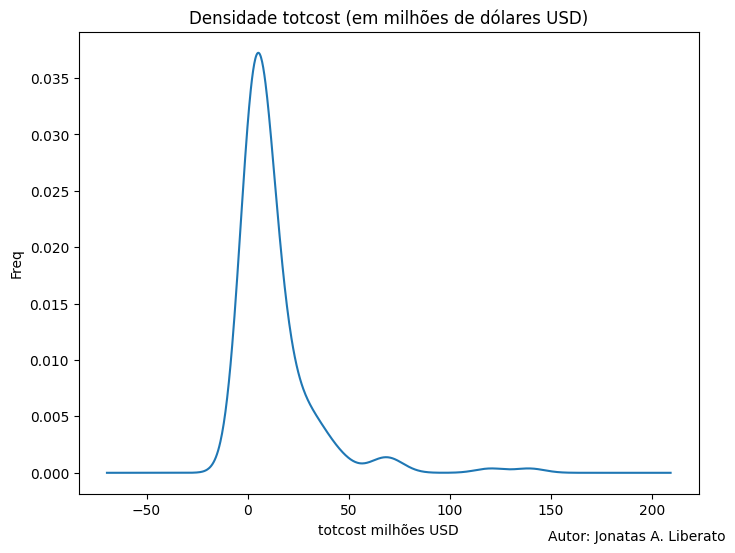

In [224]:
plt.figure(figsize=(8,6))
df['totcost'].plot(kind='kde')
plt.ylabel("Freq")
plt.xlabel("totcost milhões USD")
plt.title("Densidade totcost (em milhões de dólares USD)", loc='center')
plt.annotate("Autor: Jonatas A. Liberato", xy=(0.9, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [225]:
df.describe()

,totcost,output,plabor,pfuel,pkap,l_totcost,l_output,l_plabor,l_pfuel,l_pkap,mediancost,intercept
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.0
mean,12.976095,2133.082764,1.972069,26.176552,174.496552,1.724663,6.556652,0.671667,3.208858,5.156777,0.012875,1.0
std,19.794577,2931.942139,0.236807,7.876071,18.209476,1.421723,1.912792,0.123359,0.358900,0.100390,0.028683,0.0
min,0.082000,2.000000,1.450000,10.300000,138.000000,-2.501036,0.693147,0.371564,2.332144,4.927254,0.003075,1.0
25%,2.382000,279.000000,1.760000,21.299999,162.000000,0.867940,5.631212,0.565314,3.058707,5.087596,0.005477,1.0
50%,6.754000,1109.000000,2.040000,26.900000,170.000000,1.910135,7.011214,0.712950,3.292126,5.135798,0.006939,1.0
75%,14.132000,2507.000000,2.190000,32.200001,183.000000,2.648442,7.826842,0.783902,3.471967,5.209486,0.008571,1.0
max,139.421997,16719.000000,2.320000,42.799999,233.000000,4.937505,9.724301,0.841567,3.756538,5.451038,0.247500,1.0


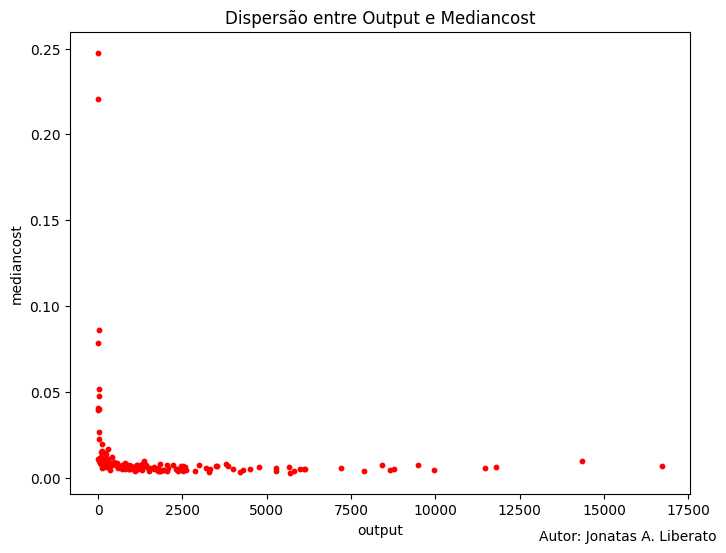

In [226]:
# Gráfico de dispersão entre output e mediancost
plt.figure(figsize=(8,6))
plt.scatter(data=df, x='output', y='mediancost', s=10, color='red')
plt.xlabel("output")
plt.ylabel("mediancost")
plt.title("Dispersão entre Output e Mediancost")
plt.annotate("Autor: Jonatas A. Liberato", xy=(0.9, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

O gráfico de dispersão mostra uma tendência positiva entre 'output' e 'mediancost', indicando que, em geral, quanto maior a produção, maior o custo mediano associado. No entanto, há uma dispersão significativa dos pontos ao redor da linha de tendência, sugerindo que outros fatores podem influenciar os custos medianos. Além disso, alguns pontos podem ser identificados como outliers, destacando observações incomuns que requerem investigação adicional.

#### Aplicando Regressão dos Mínimos Quadrados Ordinários

A Regressão dos Mínimos Quadrados Ordinários uma técnica estatística que a gente usa para estimar a relação entre uma ou mais variáveis independentes e uma variável dependente. 

O objetivo da regressão OLS é encontrar a linha (ou superfície, em casos de múltiplas variáveis independentes) que melhor se ajusta aos dados, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela linha de regressão.

> Os códigos abaixo são bastante semelhantes em termos de procedimento, mas diferem principalmente na maneira como adicionam o intercepto à regressão e na nomenclatura da coluna adicionada para representar o intercepto.

In [227]:
# Separando os dados
Y = df["l_totcost"]
X = df[["intercept","l_output", "l_plabor", "l_pfuel", "l_pkap"]]
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              l_totcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.82e-78
Time:                        08:38:07   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.5265      1.774     -1.987      0.0

A regressão estima o efeito de "l_output", "l_plabor", "l_pfuel" e "l_pkap" sobre "l_totcost", além de um intercepto.

In [228]:
# Separando os dados
Y = df["l_totcost"]
X = df[["l_output", "l_plabor", "l_pfuel", "l_pkap"]]
# Adicionando uma constante às variáveis independentes para estimar o intercepto do modelo de regressão
X = sm.add_constant(X)
# Modelo de Regressão linear ajustando-se aos dados de y e do intercepto
est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              l_totcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.82e-78
Time:                        08:38:08   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5265      1.774     -1.987      0.0

Aqui a regressão é ajustada usando as variáveis independentes com a constante adicionada. Portanto, a regressão estima o efeito de "l_output", "l_plabor", "l_pfuel" e "l_pkap" sobre "l_totcost", juntamente com um intercepto.

In [229]:
Y = df["l_totcost"]
X = df[["intercept", "l_output", "l_plabor", "l_pfuel", "l_pkap"]]
est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              l_totcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.82e-78
Time:                        08:38:08   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.5265      1.774     -1.987      0.0

In [230]:
est2.params

intercept   -3.526503
l_output     0.720394
l_plabor     0.436341
l_pfuel      0.426517
l_pkap      -0.219888
dtype: float64

#### Conclusões

O que notamos sobre os resultados da regressão:

- O modelo explica cerca de 92.6% da variação na variável dependente ('l_totcost'), indicando um bom ajuste aos dados.
- A variável 'l_output' tem um efeito positivo significativo em 'l_totcost', sugerindo que um aumento em 'l_output' está associado a um aumento em 'l_totcost'.
- 'l_plabor' não é significativo, indicando que não tem um efeito estatisticamente significativo em 'l_totcost'.
- 'l_pfuel' tem um efeito positivo significativo em 'l_totcost', indicando que um aumento em 'l_pfuel' está associado a um aumento em 'l_totcost'.
- 'l_pkap' não é significativo, sugerindo que não tem um efeito estatisticamente significativo em 'l_totcost'.
- O teste F indica que pelo menos uma das variáveis independentes é significativa no modelo.
- Outros diagnósticos indicam que os resíduos não são normalmente distribuídos, mas não há autocorrelação significativa entre eles, e não parece haver multicolinearidade entre as variáveis independentes.

##### Sobre o Teste de Hipótese

A fórmula para a especificação mais comum de teste de hipótese na análise de regressão é o conhecido *teste t*:

**t = (β - β₀) / √(σ²/n)**

Onde:

- t é a estatística do teste t, que segue uma distribuição t de Student com n-1 graus de liberdade
- β é o valor estimado do parâmetro β (coeficiente de regressão) na amostra
- β₀ é o valor hipotetizado do parâmetro β (coeficiente de regressão) na população
- σ² é a variância residual estimada do modelo de regressão
- n é o tamanho da amostra.

**Hipóteses:**
- H₀ (Hipótese nula): β = β₀
- H₁ (Hipótese alternativa): β ≠ β₀

**Interpretação:**
- se o valor absoluto de t for maior que o valor crítico da distribuição t de Student com n-1 graus de liberdade e nível de significância α, então rejeitamos a H₀ e concluímos que há evidências suficientes para afirmar que β ≠ β₀
- se o valor absoluto de t for menor que o valor crítico da distribuição t de Student com n-1 graus de liberdade e nível de significância α, então não podemos rejeitar a H₀ e não há evidências suficientes para afirmar que β ≠ β₀

**Observações:**
- É importante verificar se os pressupostos do modelo de regressão linear são satisfeitos antes de realizar o teste t
- O nível de significância α é geralmente definido como 0,05 ou 0,01
- O poder do teste depende do tamanho da amostra, da variância residual e da diferença entre β e β₀

##### Teste Global

Já a hipótese nula de um teste global em análise de regressão geralmente afirma que todos os coeficientes de regressão, exceto o intercepto, são iguais a zero. Em outras palavras, a variável dependente não é explicada por nenhuma das variáveis independentes.

**Formalmente:**

- H₀ (Hipótese nula): β₁ = β₂ = ... = βₖ = 0
- H₁ (Hipótese alternativa): Pelo menos um βᵢ ≠ 0

Onde:
- β₀ é o intercepto do modelo de regressão
- β₁, β₂, ..., βₖ são os coeficientes de regressão das variáveis independentes X₁, X₂, ..., Xₖ

**Interpretação:**
- se a p-valor do teste for menor que o nível de significância α, então rejeitamos a H₀ e concluímos que há evidências suficientes para afirmar que pelo menos um dos coeficientes de regressão é diferente de zero. Isso significa que pelo menos uma das variáveis independentes explica a variável dependente
- se a p-valor do teste for maior que o nível de significância α, então não podemos rejeitar a H₀ e não há evidências suficientes para afirmar que pelo menos um dos coeficientes de regressão é diferente de zero. Isso significa que nenhuma das variáveis independentes explica a variável dependente

**Resumindo:**

O teste global é um teste conjunto que avalia a significância de todos os coeficientes de regressão simultaneamente
Se o teste global for significativo, podemos realizar testes t individuais para cada coeficiente de regressão para determinar quais são significantes individualmente
É importante verificar se os pressupostos do modelo de regressão linear são satisfeitos antes de realizar o teste global

## APLICANDO O TESTE

Realizaremos o teste global de hipóteses em um modelo de regressão, onde todas as variáveis independentes são testadas simultaneamente para ver se têm um efeito conjunto significativo sobre a variável dependente.

- A estatística F é usada para esse teste global. Ela compara a variabilidade explicada pelo modelo (Soma dos Quadrados da Regressão - SSR) com a variabilidade não explicada (Soma dos Quadrados do Erro - SSE), e a hipótese nula é que todos os coeficientes de regressão são zero, o que significa que todas as variáveis independentes não têm efeito conjunto sobre a variável dependente.

- A matriz R e o vetor r são usados para expressar as restrições lineares nas variáveis independentes que estamos testando. No contexto do teste global, a matriz R seria uma matriz de identidade com dimensões adequadas, e o vetor r seria um vetor de zeros, indicando que não há restrições específicas nas variáveis independentes.

In [231]:
R = np.array(([0,0,0,0,0], [0,1,0,0,0], [0,0,1,0,0], [0,0,0,1,0], [0,0,0,0,1]))
R

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [232]:
# Teste estatística F
print(est.f_test(R))

<F test: F=437.68625864042923, p=4.819387489862969e-78, df_denom=140, df_num=4>


Nesse contexto, estamos interessados em testar se a soma dos coeficientes associados aos fatores produtivos em um modelo de regressão é igual a 1, o que indicaria que a função de custo está exibindo retornos constantes de escala. Portanto, temos as seguintes hipóteses:

- Hipótese nula (H₀): A soma dos coeficientes dos fatores produtivos é igual a 1.
  - Matematicamente, isso é representado como: β₃ + β₄ + β₅ = 1

- Hipótese alternativa (H₁): A soma dos coeficientes dos fatores produtivos não é igual a 1.
  - Matematicamente, isso é representado como: β₃ + β₄ + β₅ ≠ 1

Para testar essas hipóteses, podemos usar um teste de restrição linear nos coeficientes do modelo de regressão. Definimos uma matriz de restrição (R) e um vetor de restrição (r) que representam a restrição que estamos testando. 

No caso apresentado, a matriz R é [0, 0, 1, 1, 1] e o vetor r é 1. Isso significa que estamos testando se a soma dos coeficientes associados aos fatores produtivos (β₃, β₄ e β₅) é igual a 1, assumindo que as demais variáveis independentes não estão restritas.

Após definir essas restrições, podemos realizar o teste estatístico para avaliar se há evidências suficientes para rejeitar a hipótese nula em favor da hipótese alternativa.

In [233]:
# Aplicando
formula = 'l_totcost ~  intercept + l_output + l_plabor + l_pfuel + l_pkap'
results = ols(formula, df).fit()
# Podemos incluir quantas restrições desejarmos, adicionando uma vírgula (,) após a restrição
hipotese = 'l_plabor + l_pfuel + l_pkap = 1'

- H₀: β3 + β4 + β5 = 1
- H₁: β3 + β4 + β5 - 1 = 0 

Teste T de student

Nós usamos esse teste para comparar as médias de dois grupos independentes, considerando a variabilidade dos dados em cada grupo. Ele determina se a diferença entre as médias é estatisticamente significativa com base no tamanho da amostra e na variabilidade dos dados. 

In [234]:
t_test = results.t_test(hipotese)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6430      0.471     -0.757      0.450      -0.289       1.575


Aqui obtemos os resultados do teste para as restrições especificadas na hipótese. No caso, o coeficiente estimado para a restrição (c0) é 0.6430, com um erro padrão de 0.471 e um valor t associado de -0.757. O valor p (P>|t|) é 0.450, indicando que não há evidências suficientes para rejeitar a hipótese nula ao nível de significância usual de 0.05.

In [235]:
f_test = results.f_test(hipotese)
print(f_test)

<F test: F=0.5736602771442045, p=0.4500809756202523, df_denom=140, df_num=1>


Aqui um outro teste F para um conjunto diferente de restrições especificadas na hipótese. O resultado mostra um valor F alto de 851.95, com um valor p muito baixo (aproximadamente 0), sugerindo que há evidências significativas para rejeitar a hipótese nula ao nível de significância usual de 0.05.

#### Resultados

In [236]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              l_totcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.82e-78
Time:                        08:38:08   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.5265      1.774     -1.987      0.0

Com esses resultados da regressão linear ordinária (OLS) onde a variável dependente é "l_totcost" e as variáveis independentes são "One", "l_output", "l_plabor", "l_pfuel" e "l_pkap". O modelo apresenta um bom ajuste, com um alto R-quadrado de 0.926 e um baixo valor p para o teste F de 4.82e-78, indicando significância estatística para o modelo como um todo. No entanto, algumas variáveis independentes, como "l_plabor" e "l_pkap", não são estatisticamente significantes, conforme evidenciado pelos valores p acima do nível de significância de 0.05.

## CONCLUSÕES: Curvatura das estimativas

Analisando a curvatura das estimativas econômicas, otemos informações sobre como as relações entre variáveis ​​se comportam em diferentes pontos ao longo da distribuição dos dados. Isso é crucial para entender se essas relações são lineares ou não lineares e se há alguma variação na magnitude ou direção do efeito das variáveis independentes sobre a variável dependente em diferentes intervalos

In [237]:
print("Dimensões de X:", X.shape)
print("Número de coeficientes do modelo:", est.params.shape)

Dimensões de X: (145, 5)
Número de coeficientes do modelo: (5,)


In [238]:
# Predição dos valores do logaritmo natural da variável dependente "l_totcost"
logy_pred = est.predict(X)

# Conversão dos valores previstos de volta para a escala original aplicando a função exponencial
Y = np.exp(logy_pred)

# Adição dos valores previstos da variável dependente de volta ao DataFrame como uma nova coluna 'l_totcost_e'
df['l_totcost_e'] = Y

# Cálculo do custo médio estimado ('avgcost_e') dividindo os valores previstos pela variável 'output'
df['avgcost_e'] = df["l_totcost_e"] / df["output"]

# Exibição das primeiras linhas do DataFrame após a adição das colunas 'l_totcost_e' e 'avgcost_e'
df.head()

,totcost,output,plabor,pfuel,pkap,l_totcost,l_output,l_plabor,l_pfuel,l_pkap,mediancost,intercept,l_totcost_e,avgcost_e
0,0.082,2.0,2.09,17.900000,183.0,-2.501036,0.693147,0.737164,2.884801,5.209486,0.041000,1,0.072759,0.036380
1,0.661,3.0,2.05,35.099998,174.0,-0.414001,1.098612,0.717840,3.558201,5.159055,0.220333,1,0.130207,0.043402
2,0.990,4.0,2.05,35.099998,171.0,-0.010050,1.386294,0.717840,3.558201,5.141664,0.247500,1,0.160805,0.040201
3,0.315,4.0,1.83,32.200001,166.0,-1.155183,1.386294,0.604316,3.471967,5.111988,0.078750,1,0.148473,0.037118
4,0.197,5.0,2.12,28.600000,233.0,-1.624552,1.609438,0.751416,3.353407,5.451038,0.039400,1,0.164058,0.032812


1. Nós primeiro fizemos as previsões dos valores do logaritmo natural da variável dependente "l_totcost" com base nas variáveis independentes contidas no DataFrame "X", usando o modelo de regressão linear "est". 
2. Em seguida, essas previsões são convertidas de volta para a escala original aplicando a função exponencial. Esses valores previstos são então atribuídos a uma nova coluna chamada "l_totcost_e" no DataFrame "df". 
3. Por fim, é calculado o custo médio estimado ("avgcost_e") dividindo os valores previstos pela variável "output" e os resultados são adicionados ao DataFrame "df".

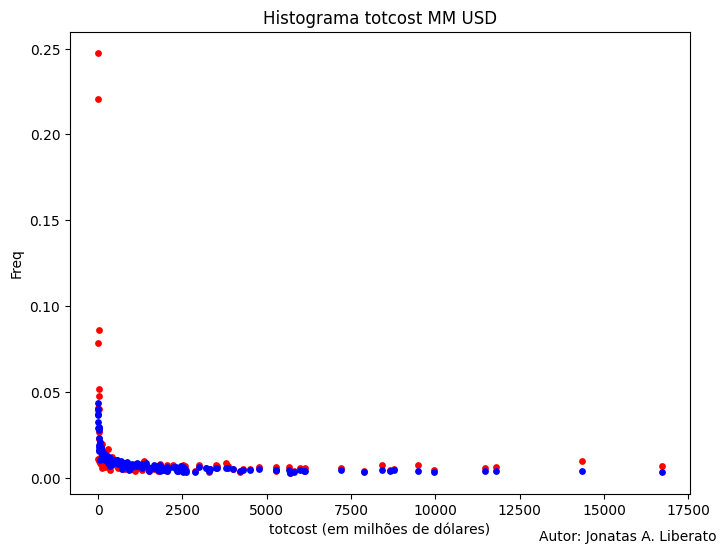

In [249]:
# Plotando a distribuição de tocost
plt.figure(figsize=(8,6))
plt.scatter(df.output, df.mediancost, s = 15, color ="red")
plt.scatter(df.output, df.avgcost_e, s = 15, color ="blue")
plt.ylabel("Freq")
plt.xlabel("totcost (em milhões de dólares)")
plt.title("Histograma totcost MM USD")
plt.annotate("Autor: Jonatas A. Liberato", xy=(0.9, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

Aqui vamos adicionar uma nova coluna ao DataFrame chamada "l_output_2", que contém o quadrado dos valores da coluna "l_output", para a usarmos em análises econométricas para modelar relações não lineares entre variáveis, capturando melhor a curvatura ou outras formas de comportamento não linear nos dados.

In [240]:
df["l_output_2"] = df["l_output"]**2
df['l_output_2']

0       0.480453
1       1.206949
2       1.921812
3       1.921812
4       2.590291
         ...    
140    84.749161
141    87.386986
142    87.900299
143    91.625710
144    94.562035
Name: l_output_2, Length: 145, dtype: float32

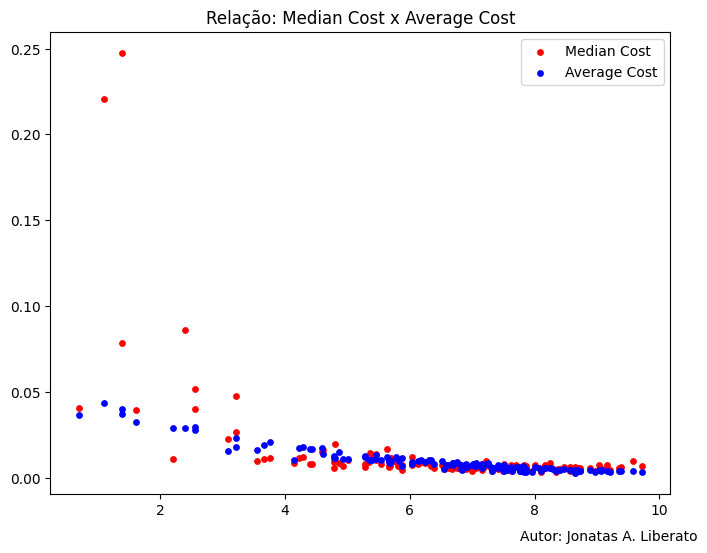

In [250]:
# Plotando os resultados
plt.figure(figsize=(8,6))
plt.scatter(df['l_output'], df['mediancost'], s=15, color="red", label="Median Cost")
plt.scatter(df['l_output'], df['avgcost_e'], s=15, color="blue", label="Average Cost")
plt.title("Relação: Median Cost x Average Cost")
plt.annotate("Autor: Jonatas A. Liberato", xy=(0.9, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.legend()
plt.show()

> Veja que ambas possuem o mesmo comportamento quando se é ultrapassado o limite de valor 4

#### Variáveis da R. Linear

Vamos definir as variáveis para uma regressão linear: 
- variável `Y` representa o logaritmo natural do custo total
- variável `X` representa uma matriz de a independentes. 

Nesse caso específico, a variável independente é apenas uma constante, representada pela coluna "intercept". O objetivo é realizar uma regressão linear simples usando o logaritmo natural do custo total como variável dependente e uma constante como variável independente.

In [242]:
Y = df["l_totcost"] # dependente
X = df[["intercept", ]] # independente
X

,intercept
0,1
1,1
2,1
3,1
4,1
...,...
140,1
141,1
142,1
143,1


In [243]:
# Estimativas:
est = sm.OLS(Y,X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              l_totcost   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 17 Apr 2024   Prob (F-statistic):                nan
Time:                        08:38:08   Log-Likelihood:                -256.27
No. Observations:                 145   AIC:                             514.5
Df Residuals:                     144   BIC:                             517.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7247      0.118     14.607      0.0

Nota-se:

1. O coeficiente de interceptação estimado é de aproximadamente 1.7247, com um erro padrão de 0.118. Isso significa que, quando todas as variáveis independentes são zero, espera-se que o logaritmo natural do custo total seja em torno de 1.7247.

2. O R-quadrado é negativo, o que é incomum e pode indicar um problema com o modelo de regressão. Um R-quadrado negativo sugere que o modelo não se ajusta aos dados de forma alguma.

3. Já para o F-statistic e Prob (F-statistic), ambos os valores estão indicados como "nan", o que geralmente significa que há um problema com o modelo, possivelmente devido ao R-quadrado negativo.

4. O teste t para o coeficiente de interceptação é significativo, com um valor-p muito baixo (praticamente zero), o que sugere que o coeficiente de interceptação é estatisticamente diferente de zero. Isso é consistente com o valor do intervalo de confiança para o coeficiente de interceptação, que não inclui zero.

Resumindo, as estimativas indicam que o modelo de regressão linear simples ajustado aos dados não é adequado, como indicado pelo R-quadrado negativo e pelos valores "nan" para F-statistic e Prob (F-statistic). O coeficiente de interceptação é significativamente diferente de zero, mas o modelo como um todo parece não fornecer uma boa descrição dos dados. Isso sugere que o modelo precisa ser revisto e possivelmente ajustado.

#### Teste de Hipóteses

In [244]:
# Definir a fórmula correta incluindo todas as variáveis independentes
formula = 'l_totcost ~ intercept + l_output + l_plabor + l_pfuel + l_pkap'

# Ajustar o modelo de regressão linear
results = ols(formula, df).fit()

# Realizar o teste de hipótese
hipotese = 'l_plabor + l_pfuel + l_pkap = 1'
t_test = results.t_test(hipotese)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6430      0.471     -0.757      0.450      -0.289       1.575


Com base no resultado do teste de hipótese:

- O coeficiente associado à restrição (`c0`) é estimado em 0.6430

- O erro padrão associado à estimativa do coeficiente é de 0.471

- O valor da estatística `t` associada ao coeficiente é -0.757

- O valor P associado à estatística `t` é 0.450

- O intervalo de confiança de 95% para o coeficiente vai de -0.289 a 1.575.

Com base nessas informações, podemos concluir que o coeficiente estimado para a restrição não é estatisticamente significativo, pois o valor P é maior que o nível de significância usual de 0.05. Isso sugere que não há evidências suficientes para rejeitar a hipótese nula de que a soma dos coeficientes das variáveis independentes é igual a 1.

### Estimativa usando o intercept

In [245]:
Y2 = df["l_totcost"]
X2 = df[["intercept", "l_output", "l_plabor", "l_pfuel", "l_pkap"]]
est2 = sm.OLS(Y2, X2).fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              l_totcost   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           4.82e-78
Time:                        08:38:09   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.5265      1.774     -1.987      0.0

# FIM